In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from importlib import reload
import classif_output_structs as cos
#cos includes: Epoch, ComboEpoch, Run, Series, Collection
cos = reload(cos)

import warnings
warnings.filterwarnings('ignore')

In [76]:
cos = reload(cos)
coll = cos.Collection(['Aug29-8020-NoMin'],best_epochs_only=True)

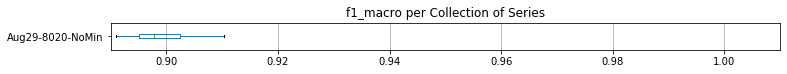

In [77]:
_=coll.boxplot('f1_macro')

SERIES: Aug29-8020-NoMin
CLASSES: 147
RUNS:
    Aug29_03 f1_w=93.7% f1_m=90.2% loss=114.169
    Aug29_08 f1_w=93.7% f1_m=90.3% loss=114.337
    Aug29_01 f1_w=93.8% f1_m=89.5% loss=114.820
    Aug29_06 f1_w=93.7% f1_m=90.6% loss=115.305
    Aug29_05 f1_w=93.9% f1_m=89.9% loss=115.363
    Aug29_07 f1_w=93.8% f1_m=89.4% loss=116.194
    Aug29_02 f1_w=93.8% f1_m=89.6% loss=116.684
    Aug29_00 f1_w=93.6% f1_m=89.1% loss=117.202
    Aug29_09 f1_w=93.7% f1_m=89.7% loss=118.893
    Aug29_04 f1_w=93.9% f1_m=91.0% loss=119.832


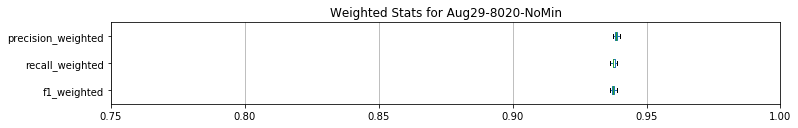

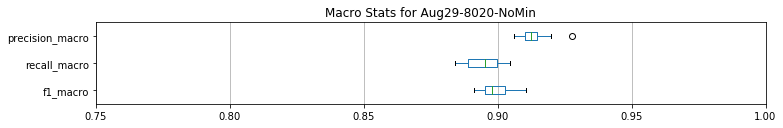

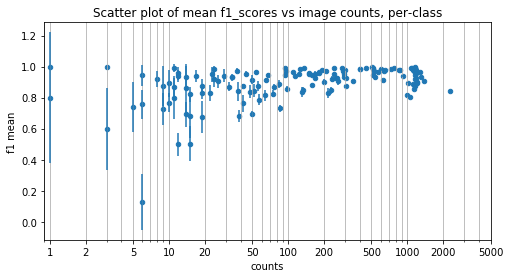

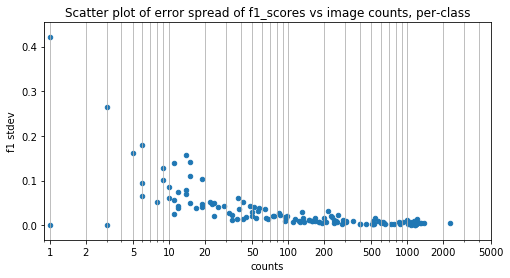

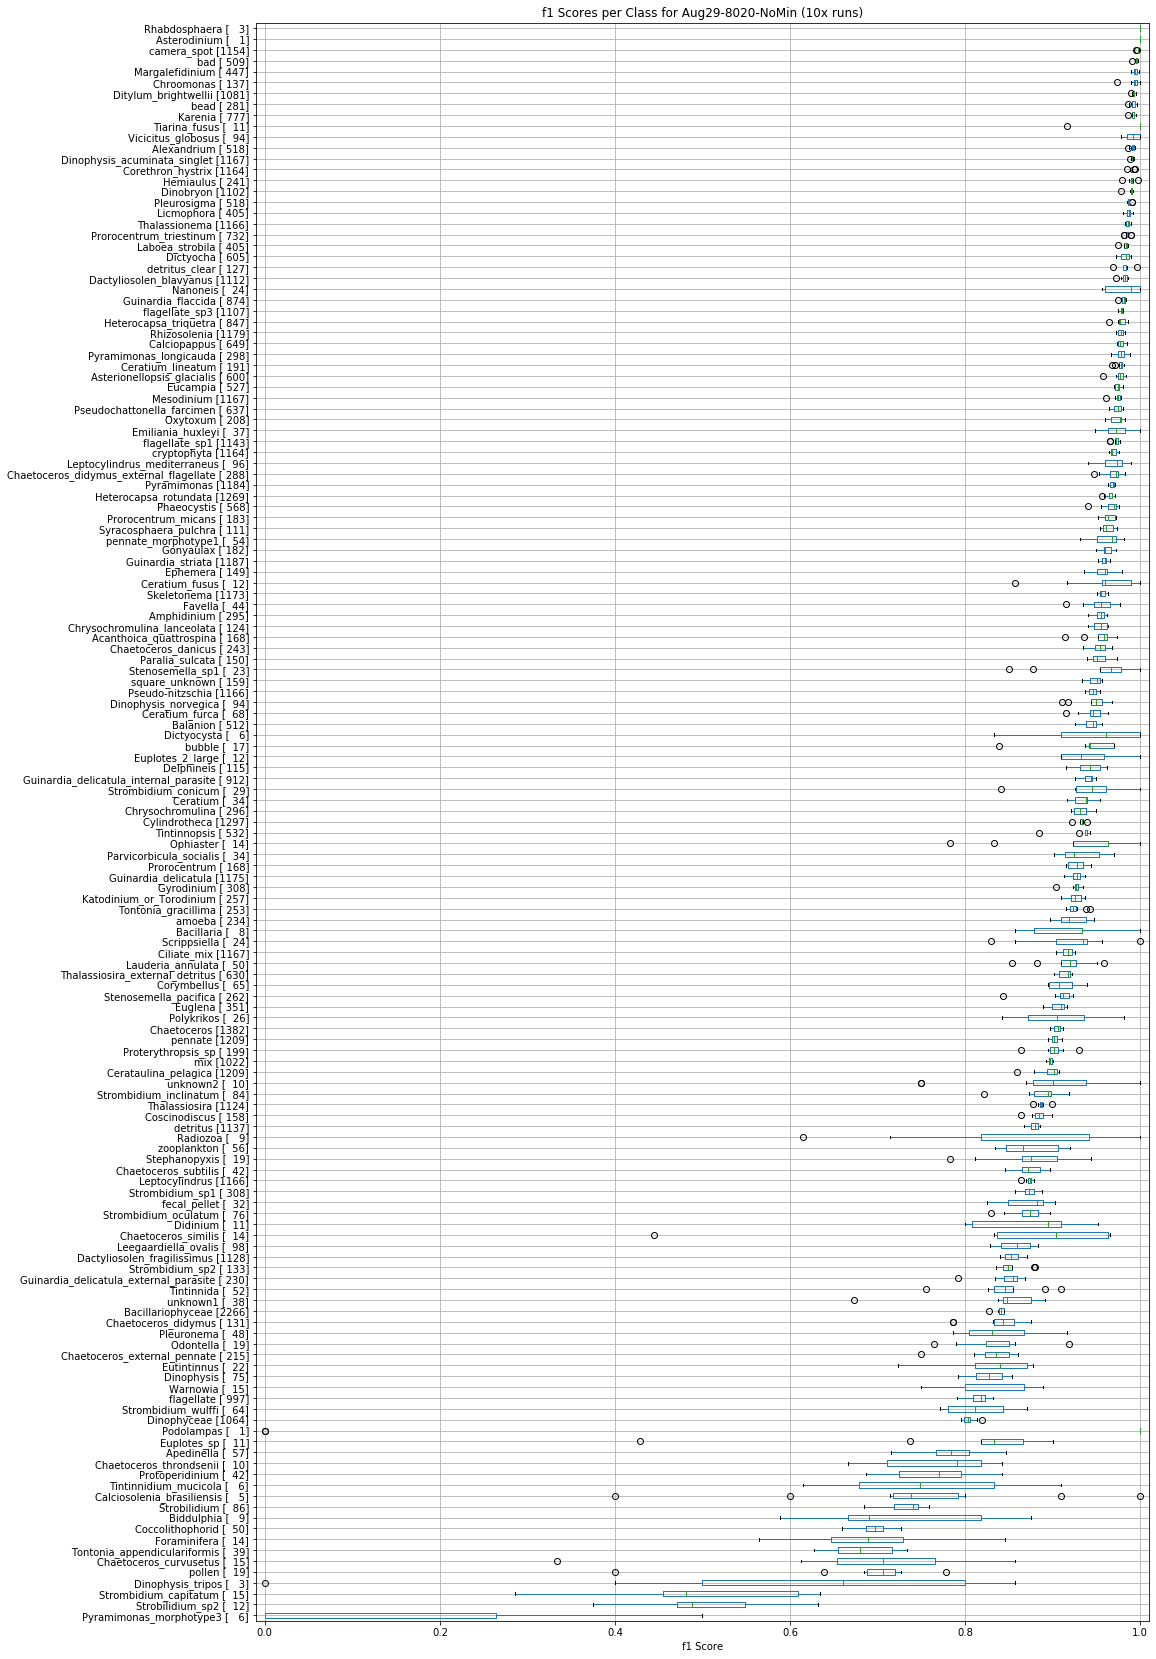

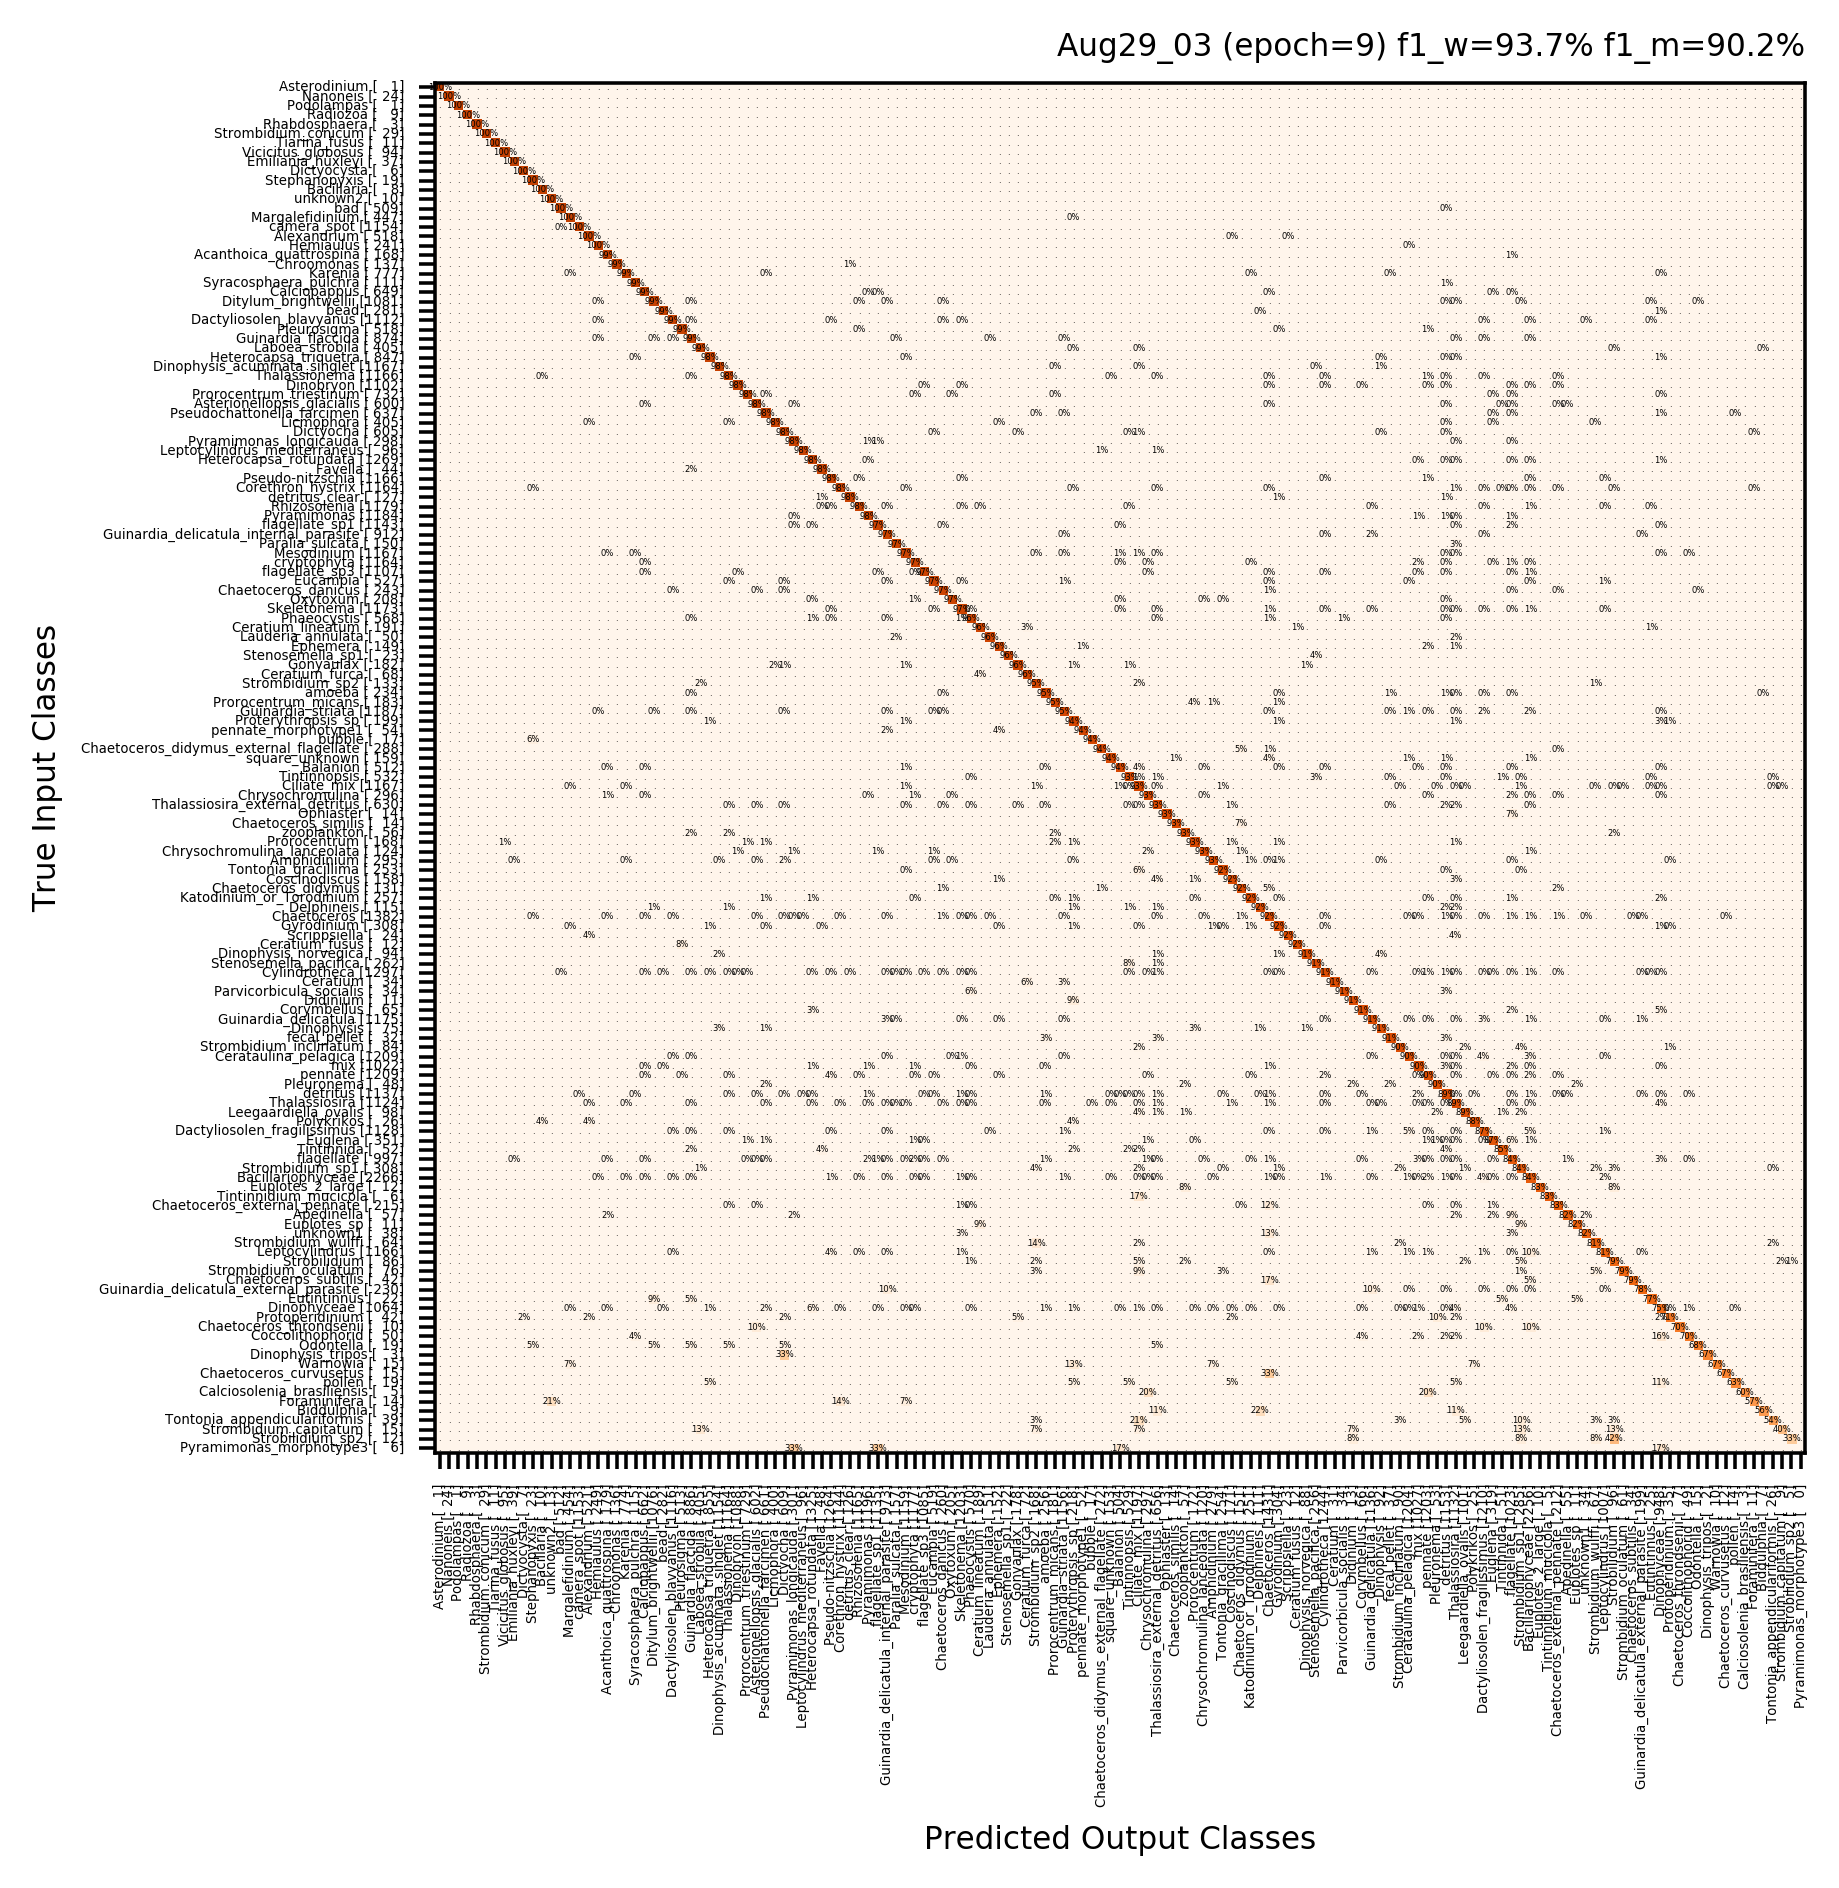

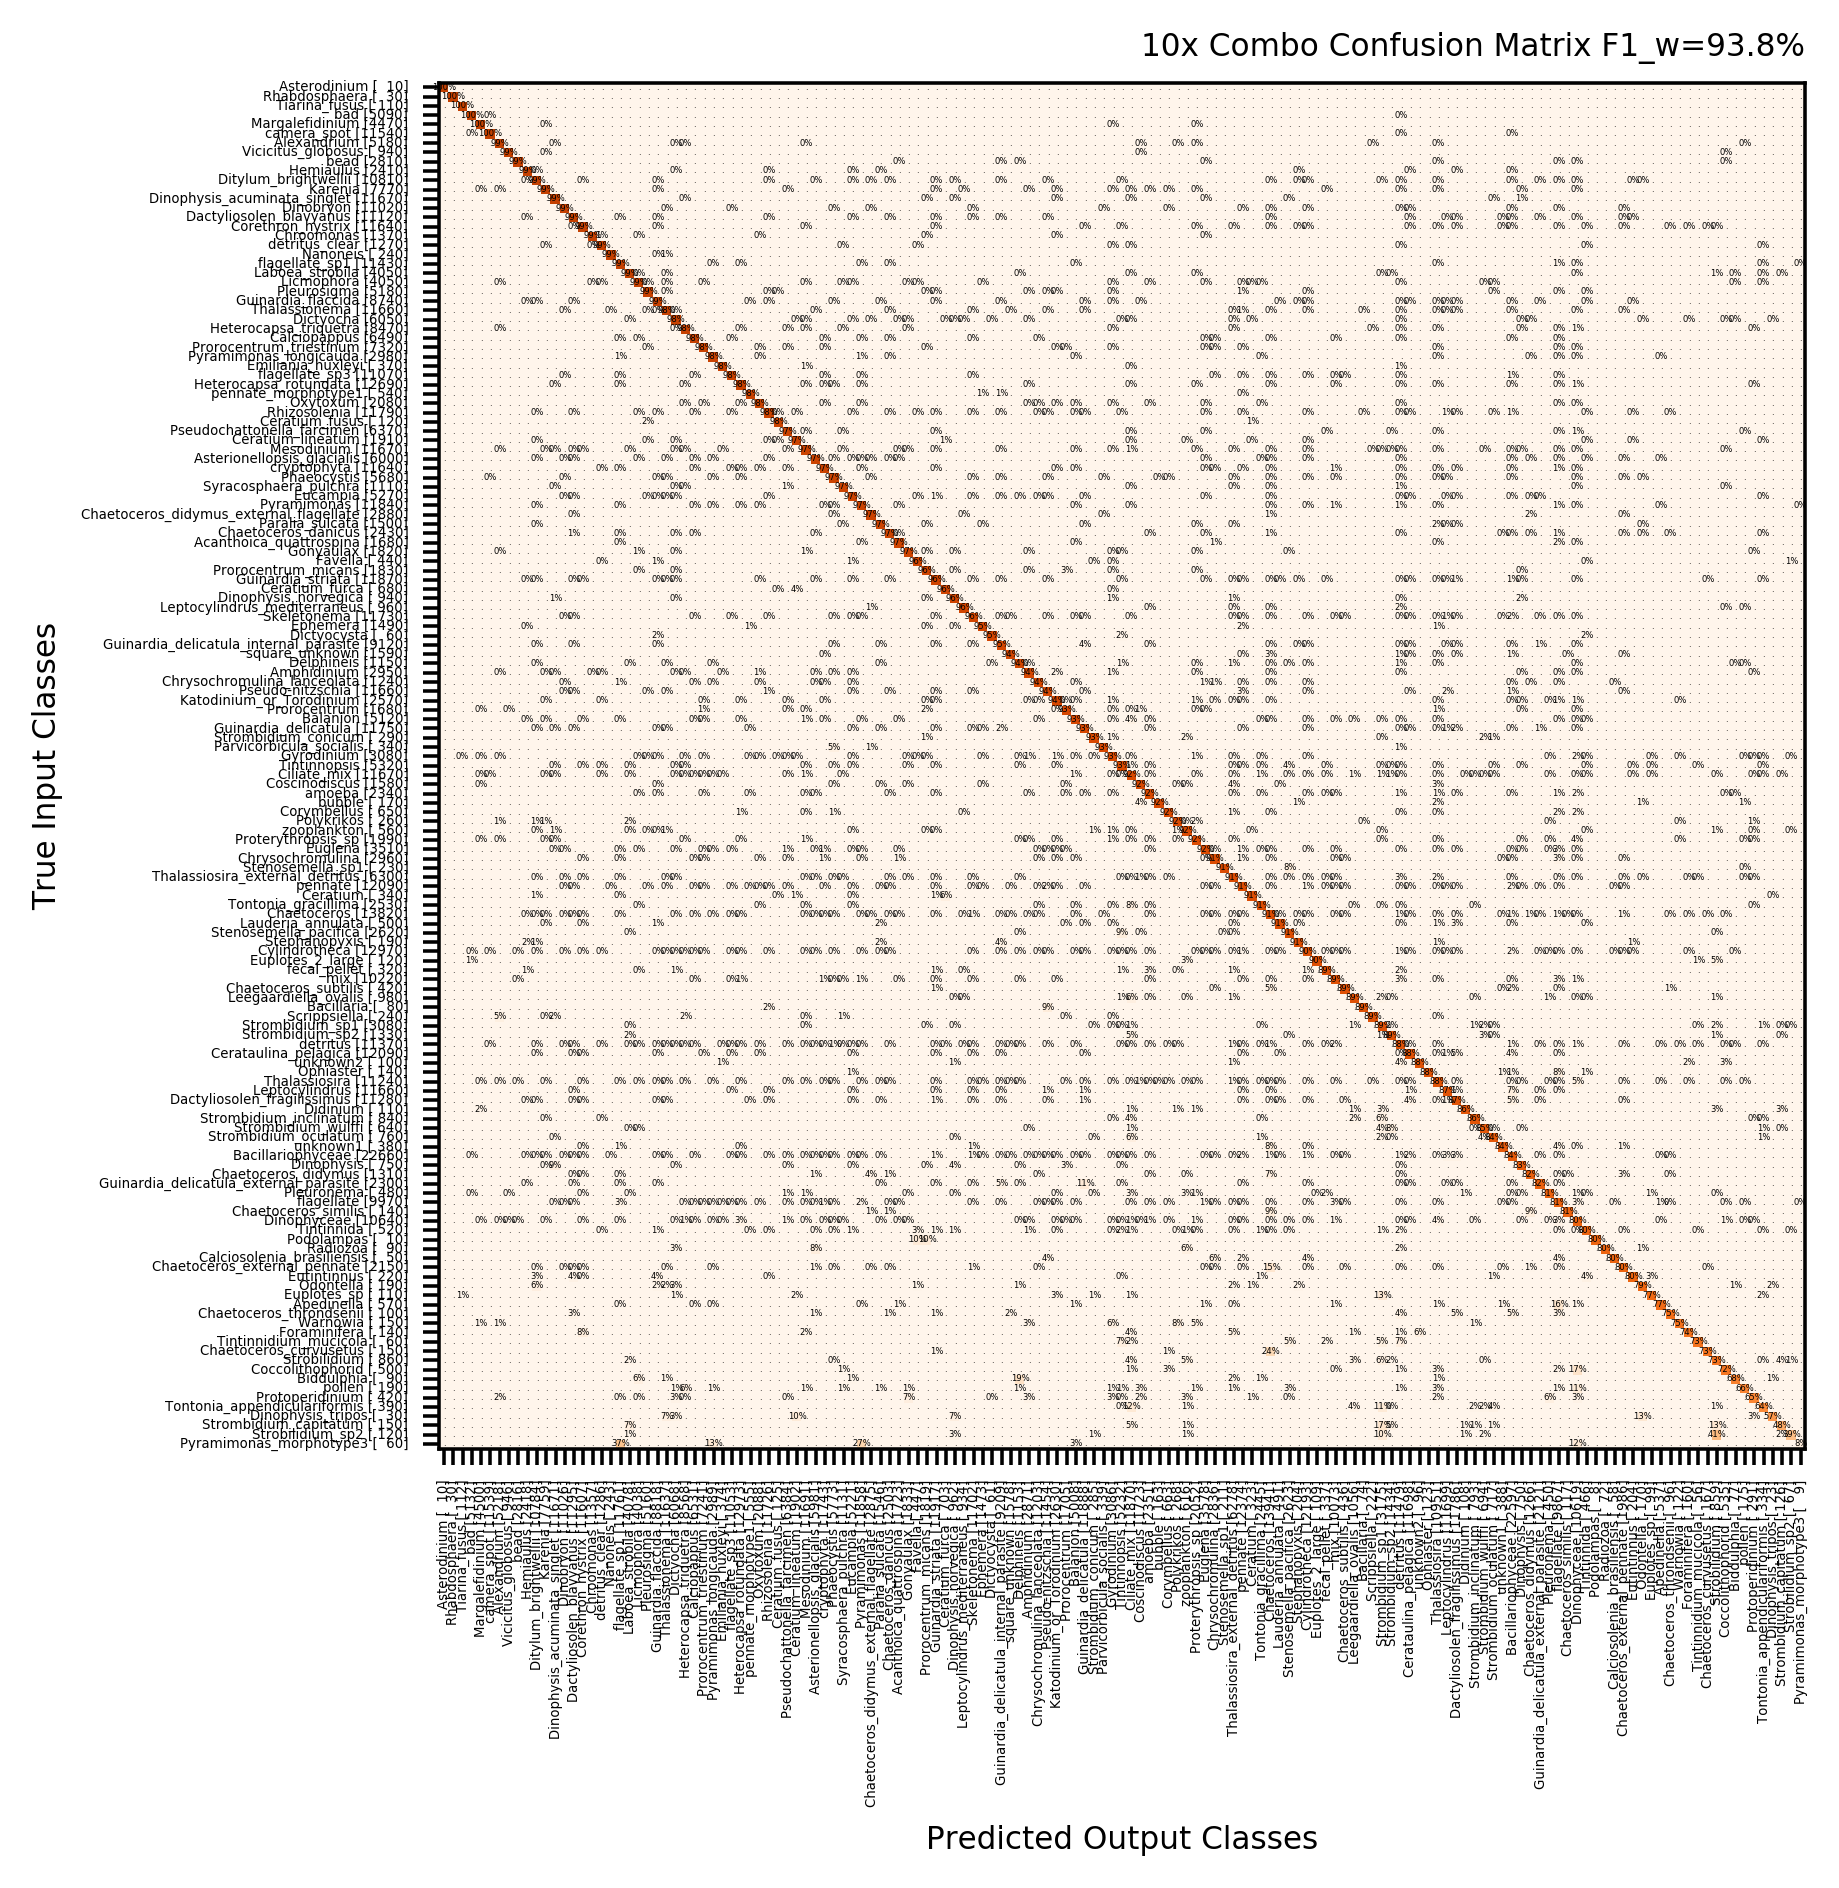

In [78]:
for series in  coll.collection:
    print('SERIES:',series.name)
    print('CLASSES:',len(series.classes))
    print('RUNS:')
    best_epochs = sorted(series.best_epochs,key=lambda be: be.eval_loss)
    [print('    {} f1_w={:.1f}% f1_m={:.1f}% loss={:.3f}'.format(be.name, 100*be.f1_weighted, 100*be.f1_macro, be.eval_loss)) for be in best_epochs]
    
    series.boxplot('weighted')
    series.boxplot('macro')
    series.plot_stat_vs_perclass_count() 
    series.plot_stat_vs_perclass_count('f1',plot_error=True)
    series.perclass_boxplot(stat='f1',sort_by='mean')
    series.best_best_epoch.plot_confusion_matrix()
    series.best_epoch_combo().plot_confusion_matrix()
        #TODO confusion matrix: if cell is 0%, show counts instead
        #TODO combo confusion-matrix but just of dupes
    

In [52]:
cos = reload(cos)
july18_series = cos.Series('output/2019-07-18_8020', best_epochs_only=True)
june17_series = cos.Series('output/2019-06-17_8020', best_epochs_only=True)

july18_combo = july18_series.best_epoch_combo()
june17_combo = june17_series.best_epoch_combo()


july18_df10 = july18_combo.pairwise_df(skip_correct=True,
                                       skip_empties=True,
                                       keep_dupes=[10,9,8])
display(july18_df10.head())
#july18_combo.naughty_dupes(minimum=4, plot=True)

,,count,images,image_counts
Input,Output,,,
Acanthoica_quattrospina,flagellate,1,[data/July18_8020/test/Acanthoica_quattrospina...,[10]
Apedinella,Pyramimonas,1,[data/July18_8020/test/Apedinella/IFCB5_2017_2...,[10]
Asterionellopsis_glacialis,detritus,1,[data/July18_8020/test/Asterionellopsis_glacia...,[9]
Bacillaria,pennate,1,[data/July18_8020/test/Bacillaria/IFCB1_2011_2...,[9]
Bacillariophyceae,Chaetoceros,3,[data/July18_8020/test/Bacillariophyceae/IFCB5...,"[10, 10, 8]"


Text(0, 0.5, 'images count')

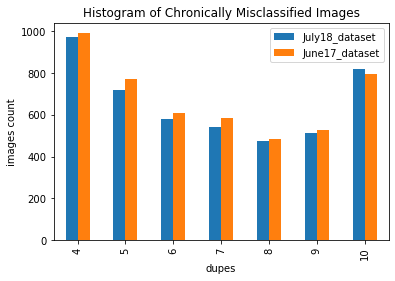

In [54]:
july18_dupesdf = july18_combo.naughty_dupes(minimum=4)
june17_dupesdf = june17_combo.naughty_dupes(minimum=4)

july18_dupesdf = july18_dupesdf.rename(columns={"count": "July18_dataset"})
june17_dupesdf = june17_dupesdf.rename(columns={"count": "June17_dataset"})

combo_dupesdf = pd.concat([july18_dupesdf,june17_dupesdf],axis=1)
#display(combo_dupesdf)
ax = combo_dupesdf.plot(kind='bar',title='Histogram of Chronically Misclassified Images')
ax.set_ylabel("images count")